<center><img src='img/ms_logo.jpeg' height=60% width = 60%></center>

<center><h1>MultiLayer Perceptrons With Keras</h1></center>

So far in this course, we've learned about Single Layers Perceptrons--the precursors to modern neural networks.  We've also learned about the activation functions used in neural networks, and the symbolic relationship they have with neurons in a brain. In this lesson, we'll put it all together and create a **_Multilayer Perceptron_** that uses multiple layers of neurons.  We'll use it to classify different types of clothing from the _Zalando Fashion Dataset_, a more complex dataset used for benchmarking and practice, in the same way that MNIST is used.  To build it, we'll use the [**_Keras_**](https://keras.io/) library--in industry-standard tool used by Deep Learning practicioners to quickly create Deep Neural Network prototypes.  Keras gives us all the power of Google's [**_TensorFlow_**](https://www.tensorflow.org/) framework, but with a clean, easy-to-use API that abstracts away all the boilerplate code needed to get TensorFlow working.

<center><h2>Why We Need Multiple Layers in our Perceptrons</h2></center>

Recall the structure of the Single-Layer Perceptron we built in unit 1:

<center><img src='img/SLP_diagram.png' height=80% width=80%></center>

This perceptron generally worked, but wasn't too effective at learning--with only one layer, it's just too simple to learn complex nonlinear functions.  Multilayer perceptrons solve this problem by stacking at least 3 layers of neurons together. At minimum, a Multilayer Perceptron must consist of:

1. An Input Layer
1. 1 or more **_'Hidden' Layers_**
1. An Output Layer

The hidden layer(s) are the 'secret sauce' that makes modern Deep Neural Networks so effective.  We'll discuss what they do, why they are considered 'hidden', and how they fit into modern Deep Neural Networks further along in this assignment.  Before we get to that, let's explore the history (and drama) that took us from Single-Layer Perceptrons to the powerful modern Neural Networks we use nowadays.


<center><h3>Some History on Perceptrons (Nerd Drama Ahead!)</h3></center>

We can stack them and have them work together to generate an overall prediction--but this comes with it's own problem.  Let's say we have the following neural network:

<center><img src='img/mlp-network.png' height=80% width=80%></center>

For the following analogy, it's helpful to think of each neuron as a person giving advice to the people in the following layer.  The people in the first layer take a look at the inputs, and (based on their weights from the previous layer, plus a bias), pass along their advice to each person in the next layer, who repeat this process until it gets to the person at the very end.  Based on the advice he received from the previous layer, who based their advice on the information they received from the previos layey (and so on and so on), the person makes a decision, which turns out to be wrong.  

This leads us to a really tough question--**_how do we divide up the "blame" for this mistake?_** 

Let's think about all the ways this group of people (or neurons) could have gotten this wrong. What if everybody's weights and biases were wrong (meaning everyone gave bad advice)? Or, what if some people have perfected exactly how much weight they should give the inputs they receive, but the inputs themselves were bad? What if every neuron was perfect, but one was way off?  How would you even know which one? If we knew who to blame, and how much to blame them, we could shift their weights accordingly and let everyone "learn" from each mistake in the training data--but this wasn't possible, because we hadn't yet figured out how to tell who we should blame for a mistake (which weights we should adjust), and how much we should blame them (which would tell us how to adjust the weights accordingly).

This was the central problem with neural networks, and the central insight behind the **_back propagation alogrithm_** (backprop for short) that powers the learning in modern neural networks. Although there were many pieces of the backprop algorithm invented as far back as 1960, no one really fully put all the pieces together until 1986, when Geoffrey Hinton, David Rummelhart, and Ronald J. Williams put all the pieces together and came up with the generalized backpropagation algorithm.  

It should be noted that until backprop was invented, no one really realized just how powerful Neural Networks could be. Although people were very excited about Rosenblatt's invention of the SLP in 1957, this excitement died down in 1969 when Marvin Minsky published the book _Perceptrons_, which made strong claims that Perceptrons were only good for toy problems.  He showed proofs that a SLP can't solve the [XOR problem](https://www.quora.com/What-is-XOR-problem-in-neural-networks).  Once Hinton and team discovered backprop and compputers continued to get more and more powerful, that set the stage for the amazing Deep Learning explosion that we see today!


<center><h2>Nuts and Bolts: Forward Prop and Back Prop</h2></center>

When we train a neural network, what is actually happening? This can be summarized as two main steps:

1. **_Forward Propagation_**
2. **_Back Propagation_**

Neural networks learn from training data in a similar way that we learn from doing practice problems and then checking to see if we got the answer correct.  First, we figure out an answer, and then we double check the answer to see if we got it right or wrong.  If we got it right, great--we understand how to solve that problem.  Don't change anything.  But when we get it wrong, we go back and figure out how we got it wrong, and shift our thinking.  This is generally what neural networks are doing. 

Before we build a working MLP in Keras, let's take a quick look at what happens during the forward prop and back prop steps for each data point in the training set. 

<center><h3>Forward Propagation</h3></center>

Each feature for a row of data is passed in to a different neuron in the **_input layer_**.  If our dataset has 20 columns (often referred to as "dimensions"), then each column will be passed into a separate column meant just for it.  This data will then feed to every neuron in the first hidden layer.  Each neuron will then compute the weighted sum of the inputs it receives (which is just the [dot product](https://mathinsight.org/dot_product_examples) of the inputs and weights), plus a bias.  The neuron then passes this weighted sum through an activation function, which we learned in the last notebook lets our networks capture nonlinearity.  The number that the activation function spits out is the output of this neuron, which is also the input that will be passed on to all neurons in the next layer.  This pattern continues, passing information from **_hidden layer_** to hidden layer until the information reaches the **_output layer_**.  This output of the output layer is the prediction that the neural network has made for the data passed to it as input.  

<center><h3>Back Propagation</h3></center>


**_Loss:_**
Since this is an instance of data from our training set, that means we have a label to check to see if the prediction made during the forward propagation step was correct.  To check our performance, we'll use a **_Loss Function_**.  You've already run across these when learning about things like regression--for example, the Sum of Squared Errors is a loss function.  The goal of the neural network during training is to shift the weights in a way that will minimize this loss function.  When it gets an a prediction correct, the loss will be 0.  This is a good thing, because if we got something correct, there's no reason to change the weights/biases around--this could do more harm than good!  However, when the network gets a prediction wrong, things get interesting.  Did it predict 0 when the label was 1, or 1 when the label was 0?  When learning from mistakes, how the network got something wrong is just as important as recognizing the mistake at all.  A clever loss function will tell us this. There are many clever loss functions in deep learning, but they are all generally some form of $y - \hat{y}$, where $y$ is the actual label, and $\hat{y}$ is the prediction made during the forward prop step.

**_Gradient Descent_**

If we output from our loss function, we can take the derivative of this loss function. If we have the derivative of this loss function, we can shift the weights up or down and see which direction decreases our loss.  If we have enough training data, and we shift the weights incrementally in a direction that decreases the loss every time we make a mistake, eventually we'll arrive at optimal values for each weight.  In layman's terms, our network will have "learned" the weights that will cause it to get the most predictions correct.  For an example, see the following diagram.

<center><img src='img/gradient_descent.png' height=60% width=60%></center>

**_Back Propagating the Error_**
If our neuron only had one weight, gradient descent would be easy--we just shift the value for that weight in the correct direction every time until we have a gradient of 0. However, we have many different neurons in our network. What do we do? If you're familiar with calculus, you've probably heard of the **_Chain Rule_**. Our derivative of our loss function is decomposable.  After all, our loss comes from the output layer, but the input to that output layer was other functions, which also had inputs that were the outputs of other functions, all the way back to the beginning.  We can trace this chain backwards, taking the derivative at every step to propagate the error backwards and tell each neuron how to shift it's own weights, all the way back to the beginning! When we put all of this together, this is how we solve the blame assignment problem, which allows us to build very deep networks that can still assign "blame" appropriately and learn the correct weights with enough training data!


(A quick note--you may be wondering where the initial values for the weights and biases for each neuron come from, before the first forward prop step on the first data point.  The simple answer is that they are just random values.  this is okay, because the network will "learn" the correct weights during the backprop step described below!)

Phew--that was a lot to cover! Enough talk--let's use **_Keras_** to build our very own MLP for classifying pictures of articles of clothing from the **_Zalando Fashion MNIST dataset_**!

**Run the following block of code to import everything we'll need for our MLP.**

In [28]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Keras module explanations

Let's take a look at the things we've imported directly from Keras, to get a better idea of what they are and how we'll use them.  
```python
from keras.models import Sequential
```
For most anything you'll be doing in Keras, you'll likely be using a Sequential model.  This is the actual model object that we'll create in our code, and then manipulate by adding layers.  
```python
from keras.layers import Dense
```
There are many different types of layers we can use inside our neural network.  The most simple one we can use a **_Dense_** layer.  You may have also heard this referred to as a **_Fully-Connected_** layer, meaning that each neuron in the layer receives the output from every single neuron in the previous layer, and passes its output to every neuron in the next layer.  The layers submodule also contains some other nifty tools, such as Dropout and BatchNormalization.  Although these aren't strictly necessary for building a Deep Neural Netowrk, they're very helpful for dealing with common problems such as overfitting! In this tutorial, we'll use them just to add some variety to our programming task--don't worry if you don't understand these concepts yet, as we'll cover them soon!

```python
from keras.datasets import fashion_mnist
```

This line just reads in an object that will import the fashion mnist dataset for us.  This is purely just to save us the time of having to import it all manually. 

Finally, we import two familiar libaries: `matplotlib` so we can visualize what some of our data looks like, and `numpy` for use in during our data preprocessing steps. 

**Run the cells below to impor the data and visualize an example from our data set. **

In [29]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

label for image: 9


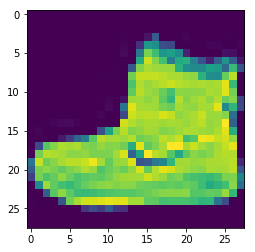

In [30]:
plt.imshow(X_train[0])
print("label for image: {}".format(y_train[0]))

<center>Looking at the table below, we can see that this image is classified as an "ankle boot".  </center>


| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle Boot  |

<center>Next, we'll run through some common steps for preprocessing our data.</center>

**Run the cell below to see the shape of X_train and X_test.**

In [31]:
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_test: {}".format(X_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of X_test: (10000, 28, 28)


<center><h3>Data Preprocessing</h3></center>

In order to prepare our data for use in our MLP, we'll need to do a couple things first:

**1.  _Reshape each image into vectors of pixel values._**  
    
Currently, each image is a 28 x 28 matrix of pixel values.  We need to reshape this into a **_vector_** (a 1d array).  Numpy can help us with this. Right now, `X_train` is a **_Tensor_** of 60,000 28 x 28 matrices.  We need to turn this into a tensor of 60,000 784 x 1 vectors (28 x 28 is 784).  During this process,we'll also leverage the power of numpy to make sure that every single data point is the correct data type--inthis case, a `float32`.  

To reshape X_train, use the following command from numpy:
    
```python
X_train = X_train.reshape(60000, 784).astype('float32')
```

<em>**You'll also need to reshape X\_test--remember that X\_test only contains 10000 rows, not 60000!**</em>

In [33]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_test = X_test.reshape(10000, 784).astype('float32')

Great! This brings us to Step 2:

**_ 2. Normalize the data._**  

By normalizing our input data, this will allow the neural network to converge on the correct answers much more quickly.  In DS2, you learned that normalizing a value means subtracting the mean of the feature and then dividing by the standard deviation--however, since we're working with image data, there's a quick shortcut we can use.  Since each data point is a pixel value, this means that each data point can only have a value between 0 and 255. 

To normalize our image data, we'll just divide every point by 255! Example follows:

```python
X_train /= 255.
```

<em>**Divide X_train and X_test by 255.**</em>

In [34]:
X_train /= 255
X_test /= 255

Now for our final preprocessing step:

**_3. Convert labels to one-hot encoding_**

As we saw when we looked at the example from our training set above, the label was just the integer `9`.  Since this is a multiclass classification problem with 10 classes, that means our output layer will contain 10 neurons, with the activation function for the output layer being softmax.  That means that we need to conver the labels to vectors of the same length to make computing our loss easier.  In each vector, every value will be a 0, except for the index that corresponds to the correct class for the label.  

Current label format:
`9`

One-hot label format: 
`[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]`

Luckily, this is a common task, so _Keras_ includes utility functions that handle this for us. The code snippet below shows an example of how to use this:

```python
y_train = keras.utils.to_categorical(y_train, 10)
```

<em>**Use the function shown above to convert the labels contained in y_train and y_test to one-hot vectors.**</em>

In [35]:
from keras.utils import np_utils

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

<center><h2>Building our MultiLayer Perceptron</h2></center>

Finally, we can build our first MLP.  Lets think about the architecture for this MLP:

1. Our input layer needs to have 784 neurons--1 for each pixel value in our input vector.
1. The MLP should contain at least 1 hidden layer.  Each layer should contain at least $\sqrt{input\ size}$ number of neurons.  It can be larger than this number, but if it's smaller than this number there's a solid chance it isn't big enough to adequately fit the data.  
1. The output layer should have the same number of neurons as the total number of classes in the dataset.  

We should also give some thought to which activation functions we'll use here.  Should we use **_sigmoid_**, **_tanh_**, or **_relu_**?  For our output layer, no decision needed--this is a multiclass classification problem, so we have to use **_softmax_** on the output layer.  

**_That's alot of decisions to make!_** If you feel overwhelmed by trying to figure out exactly what the shape of your neural network should be, don't worry--that's normal.  These are **_hyperparameters_**, and there's no clear-cut rules for which ones you should choose.  This part takes a lot of experimentation. For now, let's start with a basic layout and modify as needed based on it's performance.  



To create a neural network in Keras, we'll start by instantiating a `Sequential()` object, and then add each successive layer using the  object's `.add()` method. The code in the following cell creates a very basic MLP.  This network won't perform too well on the data, but don't worry about that just yet--we're only going to use it as a reference for how to write code with Keras. 

In [36]:
poor_model = Sequential()
poor_model.add(Dense(25, activation='sigmoid', input_shape=(784,)))
poor_model.add(Dense(10, activation='softmax'))

Once we've created the model, we still have to have keras compile it.  Run the following code to compile and inspect the network. 

In [37]:
poor_model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
poor_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                19625     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                260       
Total params: 19,885
Trainable params: 19,885
Non-trainable params: 0
_________________________________________________________________


Calling `.summary()` on a compiled model will give us a print out of each layer in the network, and tell us how many trainable parameters are contained in each layer, as well as in the model as a whole.  **_Trainable Parameters_** are any values that the model will learn through training--all the weights and biases that will start off as random values, each slowly moving towards its own optimal value with each mistake in training.  

The network above is a pitifully small model for the problem at hand, and it still has **_19,885 trainable parameters!_**  The more neurons in a model, the more parameters it will have.  Larger models may be able to capture more complexity and do better on harder tasks, but with each additional parameter, the amount of time and training data needed to properly train the model goes up! This is the essential reason why we can't just throw bigger and bigger networks at problems and solve every problem in the world--it's also why Deep Learning took a decade or two to really start getting impressive results, even though back prop was figured out in 1986.  Computers then weren't powerful enough to train MLPs large enough to solve interesting problems--after a couple of iterations of [Moore's Law](https://www.investopedia.com/terms/m/mooreslaw.asp), computers became powerful enough that this was no longer a problem!

**_Fitting the Model_**

Like any machine learning algorithm, building the model isn't enough--we need to fit it to the training data.  Run the cell below to fit the model.  Pay attention to the output--what does the `loss` value do over time? What does the `accuracy` value do over time?  We also pass it our testing data to do validation at the end of each epoch--is there a disparity between the accuracy and validation accuracy? What might this mean?

In [38]:
poor_model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 51us/step - loss: 1.8474 - acc: 0.4837 - val_loss: 1.5012 - val_acc: 0.6070
Epoch 2/10
60000/60000 [==============================] - 3s 45us/step - loss: 1.3027 - acc: 0.6652 - val_loss: 1.1567 - val_acc: 0.6883
Epoch 3/10
60000/60000 [==============================] - 3s 45us/step - loss: 1.0479 - acc: 0.7042 - val_loss: 0.9747 - val_acc: 0.7064
Epoch 4/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.9039 - acc: 0.7273 - val_loss: 0.8667 - val_acc: 0.7271
Epoch 5/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.8155 - acc: 0.7434 - val_loss: 0.7966 - val_acc: 0.7408
Epoch 6/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.7552 - acc: 0.7562 - val_loss: 0.7456 - val_acc: 0.7532
Epoch 7/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.7103 - acc: 0.7669 - val_loss: 0.7070 - val_acc

**_Fitting the Model: Vocabulary_**

`batch_size=64`: The number of examples the model trains on before updating the weights.  A batch_size of 1 would mean that the model looks at every individual example, computes the loss, and updates the weights.  In the example above, the model works through training data in groups of 64, keeping a running total of how the parameters need to be updated, and then updates them at the end of every batch.  (Pro-tip: You'll usually get better runtime performance if your batch size is a power of 2.)

`epoch=10`: The number of times the model trains on the entire training set. 1 full pass through the training data is 1 epoch.  In the code above, we went through the training data 10 full times. 

`verbose=1`: Tells Keras to give us more output rather than less during the training stage.  

`validation_data=(X_test, y_test)`: This part is optional.  We pass it the validation data to have it check it's work against the test set at the end of every epoch.  During this step, it computes the forward prop step to make predictions on each data point in the test set, and computes the `loss` and `accuracy` based on the labels contained within `y_test`, but it does not update the weights.  This is strictly to tell us how we're doing. Validation metrics are more accurate than training metrics, because training metrics might be artifically high because of overfitting.  

<center><h2>Building Your Own MLP</h2></center>

Our example network wasn't very effective, but that's okay--the goal was only to give you some example code to help you get comfortable with the way things are done in Keras.  Next, you'll build your MLP with a more complex architecture and see how it improves on the poor example above!

**_Build a network with the following architecture:_**

1. An input layer of 784 neurons. 
1. A Dense layer of 128 neurons--sigmoid activation.
1. A Dense layer of 64 neurons--sigmoid activation.
1. A Dense layer of 10 neurons--softmax activation (this is our output layer)

Use the example above to help you figure out the necessary syntax for building this model.  Make sure to add the layers in the order that you want them--the order that you add them will be the order that they appear in the final model!

In [51]:
from keras import optimizers

In [61]:
good_model = Sequential()
good_model.add(Dense(128, activation='sigmoid', input_shape=(784,)))
good_model.add(Dense(64, activation='sigmoid'))
good_model.add(Dense(10, activation='softmax'))

#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#keras.optimizers.RMSprop(lr=keras.o 0.00, rho=0.9, epsilon=None, decay=0.0)
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
good_model.compile(loss='mean_squared_error', optimizer=sgd)

In [62]:
good_model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
good_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [63]:
good_model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 75us/step - loss: 2.1795 - acc: 0.3468 - val_loss: 2.0120 - val_acc: 0.4880
Epoch 2/10
60000/60000 [==============================] - 4s 66us/step - loss: 1.7823 - acc: 0.5444 - val_loss: 1.5655 - val_acc: 0.5504
Epoch 3/10
60000/60000 [==============================] - 4s 67us/step - loss: 1.4075 - acc: 0.5971 - val_loss: 1.2855 - val_acc: 0.6192
Epoch 4/10
60000/60000 [==============================] - 4s 67us/step - loss: 1.1934 - acc: 0.6392 - val_loss: 1.1253 - val_acc: 0.6536
Epoch 5/10
60000/60000 [==============================] - 4s 67us/step - loss: 1.0607 - acc: 0.6681 - val_loss: 1.0180 - val_acc: 0.6775
Epoch 6/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.9655 - acc: 0.6916 - val_loss: 0.9355 - val_acc: 0.6978
Epoch 7/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.8900 - acc: 0.7106 - val_loss: 0.8699 - val_acc

<center><h2>Stretch Challenge: Tune Your Hyperparameters!</h2></center>

Congratulations--you've built your own working MultiLayer Perceptron using Keras! For those that are looking for an additional challenge, try tuning your hyperparameters and comparing your results! Keep track of how each does, and see if you can get a feel for what makes the model perform better, and what makes it perform worse.  

Consider playing around with the following hyperparamters

1. Activation Functions--which gives the best results?
1. Depth--how does additional additional layer(s) change the performance of the model? Is there a point of **_diminishing returns_**, where the performance doesn't really increase but the runtime does?
1. Layer width--how does changing the number of neurons in a layer affect the performance of the model?
1. Optimizer--try other [optimizers available in Keras](https://keras.io/optimizers/)--for instance, `"adam"` or `"rmsprop"`.

<h1>Answer:</h1>
<p>The first method implemented. The more layers added, the harder it get to classify the data correctly.</p>

Keep track of your results, and be scientific in your experimentation! Make small changes one at a time, and keep track of what happens each time.  If you make too many changes at once, you won't know how to **_assign blame!_** (See what I did there? Thats a backprop joke.  Admit it.  That was clever.)